In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
image = cv2.imread(r"F:\CV\EX6\360_F_281897358_3rj9ZBSZHo5s0L1ug7uuIHadSxh9Cc75.jpg", cv2.IMREAD_GRAYSCALE)
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

radius_inner, radius_outer = 30, 60  

mask_bandpass = np.ones((rows, cols), np.float32)
cv2.circle(mask_bandpass, (ccol, crow), radius_outer, 0, -1)
cv2.circle(mask_bandpass, (ccol, crow), radius_inner, 1, -1)
f_transform_bandpass = f_transform_shifted * mask_bandpass
image_bandpass = np.fft.ifft2(np.fft.ifftshift(f_transform_bandpass)).real

mask_bandreject = np.ones((rows, cols), np.float32)
cv2.circle(mask_bandreject, (ccol, crow), radius_outer, 1, -1)
cv2.circle(mask_bandreject, (ccol, crow), radius_inner, 0, -1)
f_transform_bandreject = f_transform_shifted * mask_bandreject
image_bandreject = np.fft.ifft2(np.fft.ifftshift(f_transform_bandreject)).real


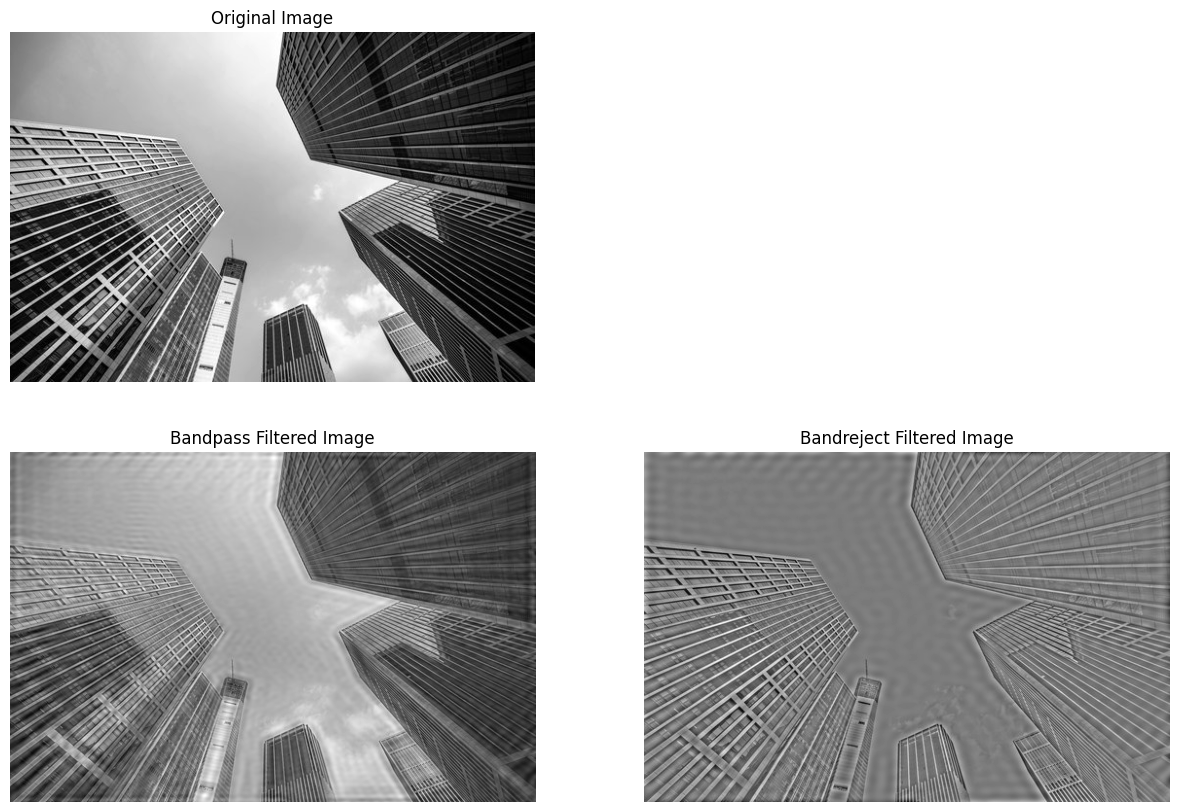

In [7]:

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Bandpass Filtered Image')
plt.imshow(image_bandpass, cmap='gray')
plt.axis('off')


plt.subplot(2, 2, 4)
plt.title('Bandreject Filtered Image')
plt.imshow(image_bandreject, cmap='gray')
plt.axis('off')



plt.show()
